In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateparser
import warnings
warnings.filterwarnings('ignore')

# DEFINE PROBLEM

- Dataset is taken from Bakery Cafe Shop Located in Edinburgh, Scotland
- Available transaction data period: October 30th 2016 until April 9th 2017

# DEFINE GOALS

- Boost food and beverages sales through transaction data analysis
- Reduce losses through stock optimization

### IMPORT FILE

In [2]:
df = pd.read_csv('bread basket.csv')

### DATA TYPE OVERALL CHECK

In [3]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [4]:
print(df.shape)

(20507, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [6]:
## df.head(), df.shape, df.info() is utilized to capture dataset genereal information

# DESCRIPTIVE ANALYSIS, HANDLING OUTLIERS, AND HANDLING MISSING VALUE

### DESCRIPTIVE ANALYSIS

In [7]:
df.describe(include='O')
## To get general information of Categorical Statistic
## From this table we know, there are 94 unique items
## Top item sold in Edinburgh Bakery Shop is Coffee
## There are 4 unique day period
## Most transaction occurred on Afternoon Period
## There are 2 unque weekday weekend 
## Most transaction occurred on weekday

,Item,date_time,period_day,weekday_weekend
count,20507,20507,20507,20507
unique,94,9182,4,2
top,Coffee,05-02-2017 11:58,afternoon,weekday
freq,5471,12,11569,12807


In [8]:
df['Item'].unique()
# To Get Unique Item Sold in Edinburgh Bakery Shop

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

In [9]:
df['period_day'].unique()
# To get Unique Period Day in Edinburgh

array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

In [10]:
df['weekday_weekend'].unique()
# To get Unique WeekdayWeekend 

array(['weekend', 'weekday'], dtype=object)

### MISSING VALUE CHECK & HANDLING

In [11]:
df.isna().sum()
## From information below, dataset has no missing value. So, we don't need to drop or fill any value into dataset.

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

### OUTLIERS CHECK & HANDLING

We don't do Outliers Check due there are no Numerical Table on dataframe

### DATE AND TIME HANDLING

In [12]:
df.dtypes
## Knowing current type data of Date & Time ==> Still in object type

Transaction         int64
Item               object
date_time          object
period_day         object
weekday_weekend    object
dtype: object

In [13]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')
## Change Date Tipe Type Data Into datetime64

In [14]:
df.dtypes
## Date & Time Data Type have been changed

Transaction                 int64
Item                       object
date_time          datetime64[ns]
period_day                 object
weekday_weekend            object
dtype: object

In [15]:
df['date_time']

0       2016-10-30 09:58:00
1       2016-10-30 10:05:00
2       2016-10-30 10:05:00
3       2016-10-30 10:07:00
4       2016-10-30 10:07:00
                ...        
20502   2017-04-09 14:32:00
20503   2017-04-09 14:32:00
20504   2017-04-09 14:57:00
20505   2017-04-09 14:57:00
20506   2017-04-09 15:04:00
Name: date_time, Length: 20507, dtype: datetime64[ns]

In [16]:
purchase_dt = df['date_time'].dt

In [17]:
df['month'] = purchase_dt.month
df['year'] = purchase_dt.year
df['day'] = purchase_dt.day
df['nameday'] = purchase_dt.day_name()
df['hour'] = purchase_dt.hour
df['yearmonth'] = purchase_dt.to_period('M')
df['yearmonth'] = df['yearmonth'].astype(str)
## Make Month & Day Name Column for further analysis

In [18]:
hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['nameday'] = pd.Categorical(df['nameday'], categories=hari, ordered=True)

In [19]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,year,day,nameday,hour,yearmonth
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,2016,30,Sunday,9,2016-10
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016-10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016-10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016-10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016-10


# EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION

In [20]:
##### Categorize Item 
other = ["Jam" , "Afternoon with the baker" , "Art Tray" , "Extra Salami or Feta" , "Eggs", "Granola","Tshirt","My-5 Fruit Shoot","Ella's Kitchen Pouches",
         "Crisps", "Dulce de Leche","Valentine's card","Duck egg","Pick and Mix Bowls","Christmas common","Mighty Protein","Chocolates",
         "Postcard","Gingerbread syrup","Drinking chocolate spoons","Muesli","Nomad bag","Argentina Night","Coffee granules","Victorian Sponge","Basket",
         "Half slice Monster" , "Honey" , "Bare Popcorn", "Mortimer", "Cherry me Dried fruit", "Bowl Nic Pitt" , "Chimichurri Oil","Fairy Doors",
         "Hack the stack", "Siblings", "Spread","Adjustment","Gift voucher","Polenta","The BART", "Lemon and coconut"]

food_bakery = ["Bread","Cake", "Pastry","Sandwich","Medialuna","Cookies","Brownie","Muffin","Alfajores","Scone","Toast","Scandinavian","Fudge","Baguette","Tiffin",
               "Jammie Dodgers","The Nomad","Focaccia","Vegan mincepie","Bakewell","Tartine","Panatone","Bread Pudding","Raspberry shortbread sandwich","Plum & polenta",
               "Raw bars","Crepes","Kids biscuit","Caramel bites", "Truffles", "Empanadas"]

food_main_dishes = ["Farm House","Soup","Spanish Brunch","Chicken Stew","Hearty & Seasonal","Salad","Frittata","Keeping It Local","Vegan Feast","Pintxos",
                    "Brioche and salami","Bacon","Chicken sand", "Tacos/Fajita"]

all_food = ["Bread","Cake", "Pastry","Sandwich","Medialuna","Cookies","Brownie","Muffin","Alfajores","Scone","Toast","Scandinavian","Fudge","Baguette","Tiffin",
            "Jammie Dodgers","The Nomad","Focaccia","Vegan mincepie","Bakewell","Tartine","Panatone","Bread Pudding","Raspberry shortbread sandwich","Plum & polenta",
            "Raw bars","Crepes","Kids biscuit","Caramel bites", "Truffles", "Empanadas","Farm House","Soup","Spanish Brunch","Chicken Stew","Hearty & Seasonal","Salad","Frittata","Keeping It Local","Vegan Feast","Pintxos",
                    "Brioche and salami","Bacon","Chicken sand", "Tacos/Fajita"]

beverages = ["Coffee" , "Tea", "Hot chocolate","Juice", "Coke", "Mineral water","Smoothies"]

In [21]:
kategori_raw = []
for i in df['Item']:
    if i in all_food:
        kategori_raw.append('Food')
    elif i in beverages :
        kategori_raw.append('Beverages')
    else:
        kategori_raw.append('Others')

df['item_category'] = kategori_raw

In [22]:
bakery_raw = []
for i in df['Item']:
    if i in food_bakery:
        bakery_raw.append('Bakery')
    else:
        bakery_raw.append('Non Bakery')

df['bakery_category'] = bakery_raw

### UNIVARIATE ANALYSIS

In [23]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,year,day,nameday,hour,yearmonth,item_category,bakery_category
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,2016,30,Sunday,9,2016-10,Food,Bakery
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016-10,Food,Bakery
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016-10,Food,Bakery
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016-10,Beverages,Non Bakery
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016-10,Others,Non Bakery


In [24]:
## Compare Average 2 Months Sales in 2016 VS Average 2 Months Sales in 2017 (November, December, January, February)
year_comp = [11, 12, 1, 2]
df_yearly_comparison = df[df['month'].isin(year_comp)]

In [25]:
df_yearsales_comp1 = df_yearly_comparison.pivot_table(index='year', values='period_day', aggfunc='count').reset_index()
df_yearsales_comp1.rename(columns = {'period_day':'sales'}, inplace=True)
df_yearsales_comp1

,year,sales
0,2016,7775
1,2017,7262


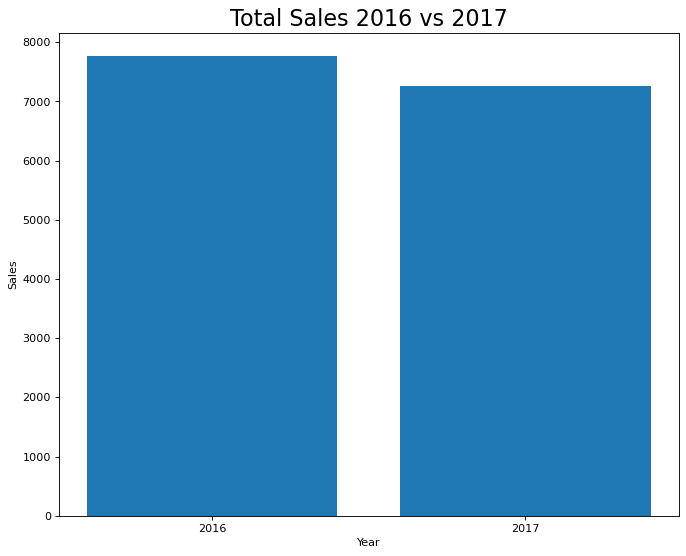

In [26]:
plt.figure(figsize=(10,8), dpi=80)
plt.bar(x=df_yearsales_comp1['year'], height = df_yearsales_comp1['sales'])
plt.title('Total Sales 2016 vs 2017', size=20)
plt.xlabel("Year",size = 10)
plt.ylabel("Sales", size = 10)
plt.xticks(np.arange(2016,2018,1))
plt.show()

##### Sales By Year
Sales for 2 months in 2016 (November, December) are larger than Sales for 2 Months in 2017 (January, February)

In [27]:
df_monthly_salestotal = df.pivot_table(index='yearmonth', values='period_day', aggfunc='count').reset_index()
df_monthly_salestotal.rename(columns = {'period_day':'total_sales'}, inplace=True)
df_monthly_salestotal.drop(index=0, inplace=True)
df_monthly_salestotal.drop(index=6, inplace=True)
df_monthly_salestotal
## To get Monthly Trend Sales (Oct 2016 & April 2017 is dropped due to incomplete date transaction record)

,yearmonth,total_sales
1,2016-11,4436
2,2016-12,3339
3,2017-01,3356
4,2017-02,3906
5,2017-03,3944


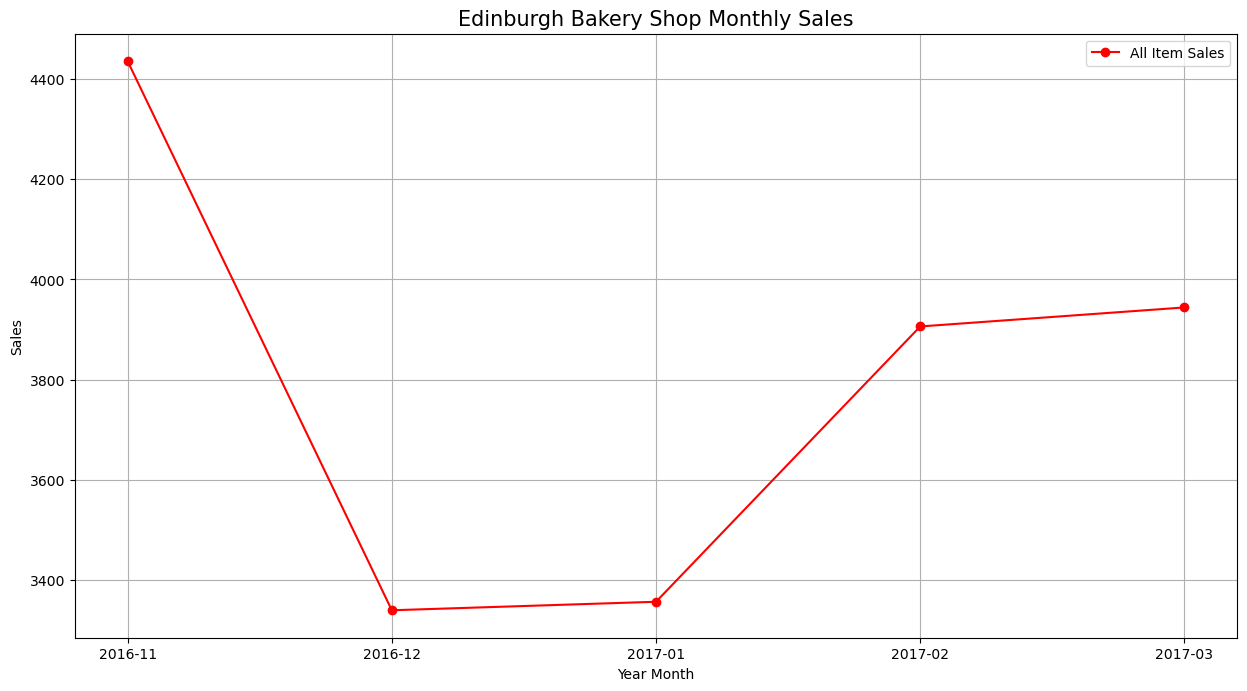

In [28]:
plt.figure(figsize=(15,8),dpi=100)
plt.plot(df_monthly_salestotal['yearmonth'], df_monthly_salestotal['total_sales'], 'ro-', )
plt.title("Edinburgh Bakery Shop Monthly Sales", size=15)
plt.xlabel("Year Month")
plt.ylabel("Sales")
plt.grid(True)
plt.legend(["All Item Sales", "Bakery Sales", "Food Non Bakery Sales", "Beverages Sales"], loc=0)
plt.savefig('MonthlySales.png')
plt.show()
# To show graphic monthly sales tren

##### Sales By Month
- Most transaction occurred on November 2016 
- Least transaction occored on December 2016

In [29]:
df_daily_salestotal = df.pivot_table(index='day', values='period_day', aggfunc='count').reset_index()
df_daily_salestotal.rename(columns = {'period_day':'total_sales'}, inplace=True)
df_daily_salestotal
# To get Daily Sales Transaction Sales

,day,total_sales
0,1,625
1,2,597
2,3,858
3,4,1048
4,5,924
5,6,739
6,7,741
7,8,700
8,9,596
9,10,672


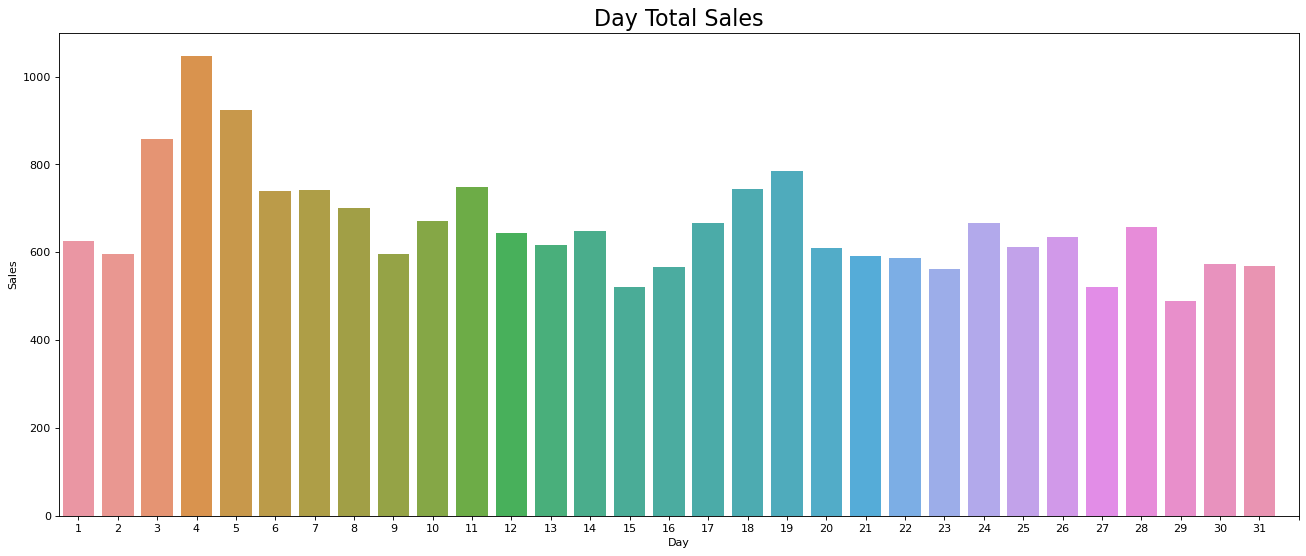

In [30]:
plt.figure(figsize=(20,8), dpi=80)
sns.countplot(df['day'])
plt.title('Day Total Sales', size=20)
plt.xlabel("Day",size = 10)
plt.ylabel("Sales", size = 10)
plt.xticks(np.arange(0,32,1))
plt.show()
# To show daily tren transaction sales graphic

##### Sales By Day
- Most transaction occurred on the beginning of the month

In [31]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,year,day,nameday,hour,yearmonth,item_category,bakery_category
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,2016,30,Sunday,9,2016-10,Food,Bakery
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016-10,Food,Bakery
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016-10,Food,Bakery
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016-10,Beverages,Non Bakery
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016-10,Others,Non Bakery


In [32]:
df_daily_salestotal = df.pivot_table(index='nameday', values='period_day', aggfunc='count').reset_index()
df_daily_salestotal.rename(columns = {'period_day':'total_sales'}, inplace=True)
df_daily_salestotal
# To get Sales Transaction Sales/nameday

,nameday,total_sales
0,Monday,2324
1,Tuesday,2392
2,Wednesday,2321
3,Thursday,2646
4,Friday,3124
5,Saturday,4605
6,Sunday,3095


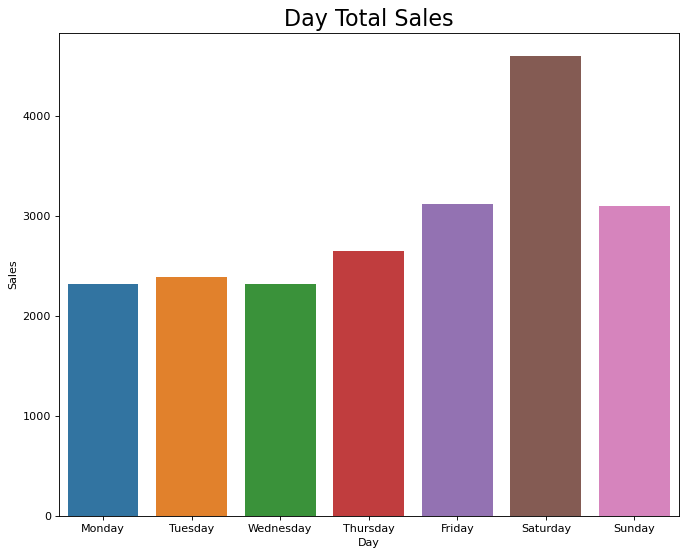

In [33]:
plt.figure(figsize=(10,8), dpi=80)
sns.countplot(df['nameday'])
plt.title('Day Total Sales', size=20)
plt.xlabel("Day",size = 10)
plt.ylabel("Sales", size = 10)
plt.show()
# To show tren transaction sales graphic by nameday

##### Sales By Nameday
- Most Transaction occurred on Saturday 
- Least Transaction occurred on Wednesday

In [34]:
df_weekname_salestotal = df.pivot_table(index='weekday_weekend', values='period_day', aggfunc='count').reset_index()
df_weekname_salestotal.rename(columns = {'period_day':'total_sales'}, inplace=True)
df_weekname_salestotal
# To get Sales Transaction by weekname

,weekday_weekend,total_sales
0,weekday,12807
1,weekend,7700


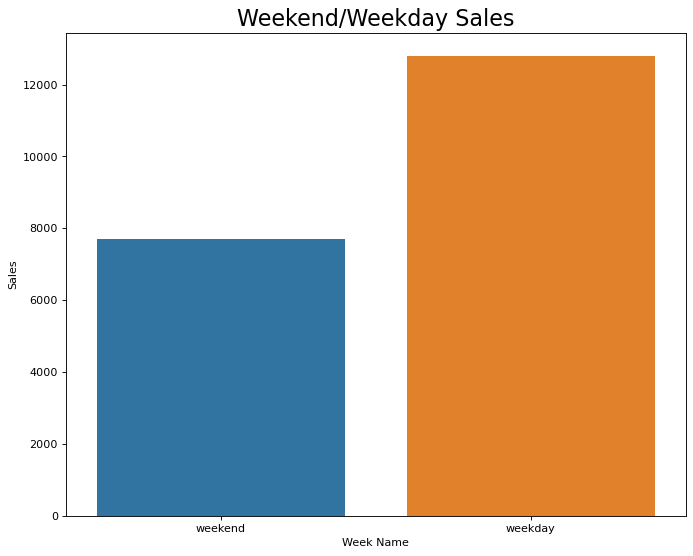

In [35]:
plt.figure(figsize=(10,8), dpi=80)
sns.countplot(df['weekday_weekend'])
plt.title('Weekend/Weekday Sales', size=20)
plt.xlabel("Week Name",size = 10)
plt.ylabel("Sales", size = 10)
plt.show()
# To show tren transaction sales graphic by week name

In [36]:
averages_weekdays_sales = (df_weekname_salestotal.loc[0]['total_sales'])/5
averages_weekdays_sales

2561.4

In [37]:
averages_weekend_sales = (df_weekname_salestotal.loc[1]['total_sales'])/2
averages_weekend_sales

3850.0

##### Sales By Weekname
- Although from graphic, most transaction occourred on Weekday, when we divided with number of days, most transaction occurred on weekend

In [38]:
period = ['morning', 'afternoon', 'evening', 'night']
df['period_day'] = pd.Categorical(df['period_day'], categories=period, ordered=True)

In [39]:
df_periodtime_sales = df.pivot_table(index='period_day', values='weekday_weekend', aggfunc='count').reset_index()
df_periodtime_sales.rename(columns = {'weekday_weekend':'total_sales'}, inplace=True)
df_periodtime_sales

,period_day,total_sales
0,morning,8404
1,afternoon,11569
2,evening,520
3,night,14


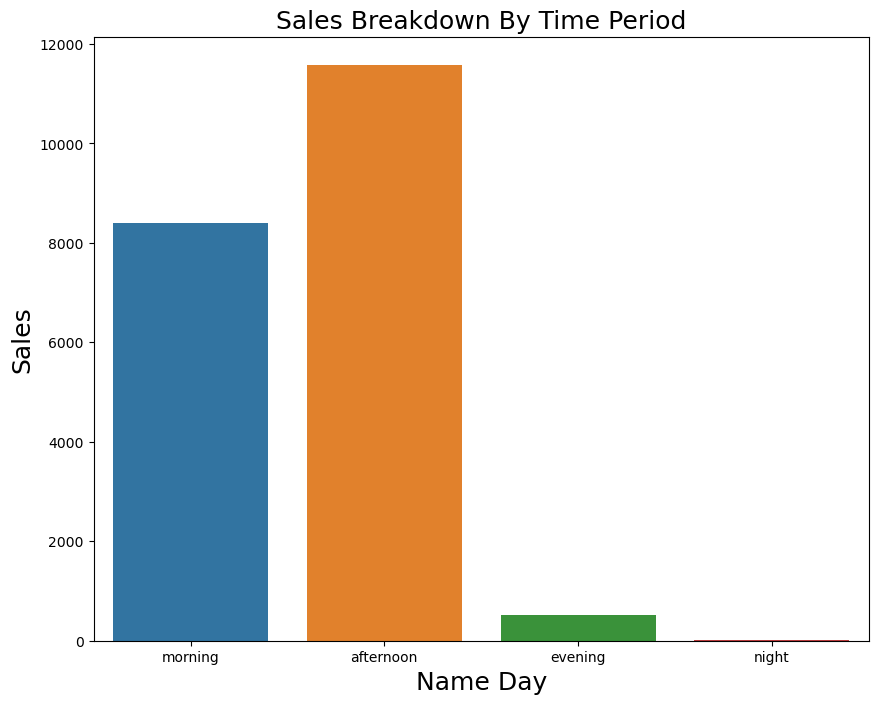

In [40]:
plt.figure(figsize=(10,8),dpi=100)
sns.countplot(df['period_day'])
plt.title("Sales Breakdown By Time Period",size=18)
plt.xlabel('Name Day',size=18)
plt.ylabel("Sales",size=18)
plt.show()

##### Sales By Period Time
- Most Tranasaction Occurred on Afternoon Period
- Least Transaction Occured on Evening & Night Period
- From research https://www.timeanddate.com/weather/uk/edinburgh/historic?month=4&year=2017 : the weather during this transaction period was on winter --> People tend to stay at home on evening and night

In [41]:
df_sales_itemcategory = df.pivot_table(index='item_category', values='period_day', aggfunc='count').reset_index()
df_sales_itemcategory.rename(columns = {'period_day':'sales'}, inplace=True)
df_sales_itemcategory 
# To get Sales Transaction by item category

,item_category,sales
0,Beverages,8263
1,Food,11649
2,Others,595


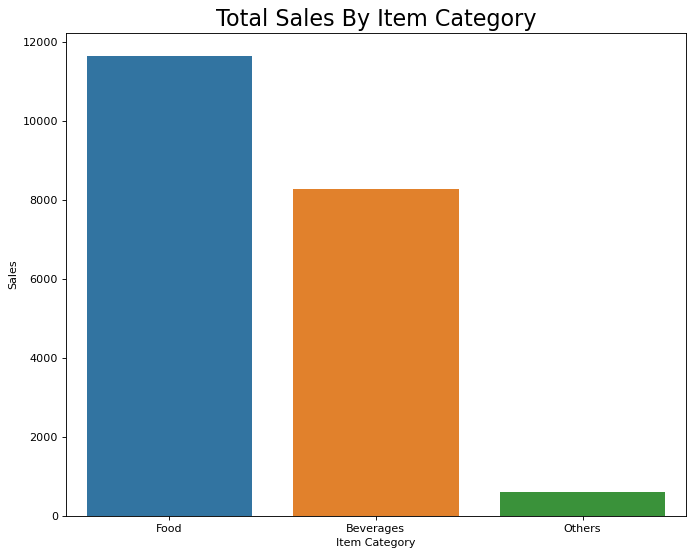

In [42]:
plt.figure(figsize=(10,8), dpi=80)
sns.countplot(df['item_category'])
plt.title('Total Sales By Item Category', size=20)
plt.xlabel("Item Category",size = 10)
plt.ylabel("Sales", size = 10)
plt.show()
# To show tren transaction sales graphic by Item Category

In [ ]:
- Food is the top category item sold for all transaction in Edinburgh Bakeryshop
- Beverages is the second top category item sold for all transaction in Edinburgh Bakeryshop

In [43]:
df_sales_food = df[(df['item_category']=='Food')].pivot_table(index='bakery_category', values='period_day', aggfunc='count').reset_index()
df_sales_food.rename(columns = {'period_day':'sales'}, inplace=True)
df_sales_food 

,bakery_category,sales
0,Bakery,10250
1,Non Bakery,1399


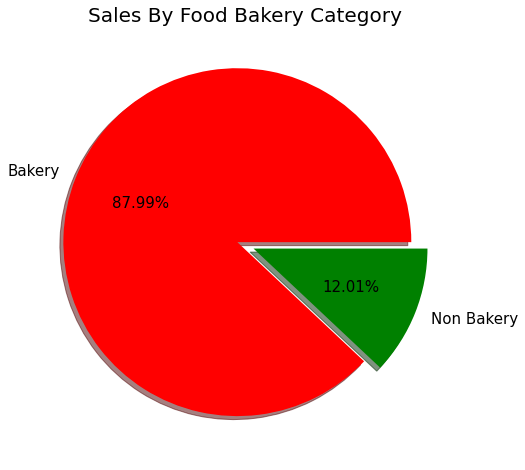

In [44]:
plt.figure(figsize=(10,8))
plt.pie(df_sales_food['sales'], labels=df_sales_food['bakery_category'],
       colors=['r', 'g'],
       shadow=True, 
       textprops ={
           'size' :15,
           'color' : 'black'
       },
       autopct = '%1.2f%%',
        explode=(0.05, 0.05) ## Supaya ada space => bagiannya harus sama kalau beda error
       )
plt.title('Sales By Food Bakery Category', size=20)
plt.show()

##### Sales By Food Bakery Non Bakery Category
- Bakery category dominates food category sales in Edinburgh Bakery Store

In [45]:
df_top_item = df.pivot_table(index='Item', values='period_day', aggfunc='count').sort_values('period_day', ascending=False).head(10).reset_index()
df_top_item

,Item,period_day
0,Coffee,5471
1,Bread,3325
2,Tea,1435
3,Cake,1025
4,Pastry,856
5,Sandwich,771
6,Medialuna,616
7,Hot chocolate,590
8,Cookies,540
9,Brownie,379


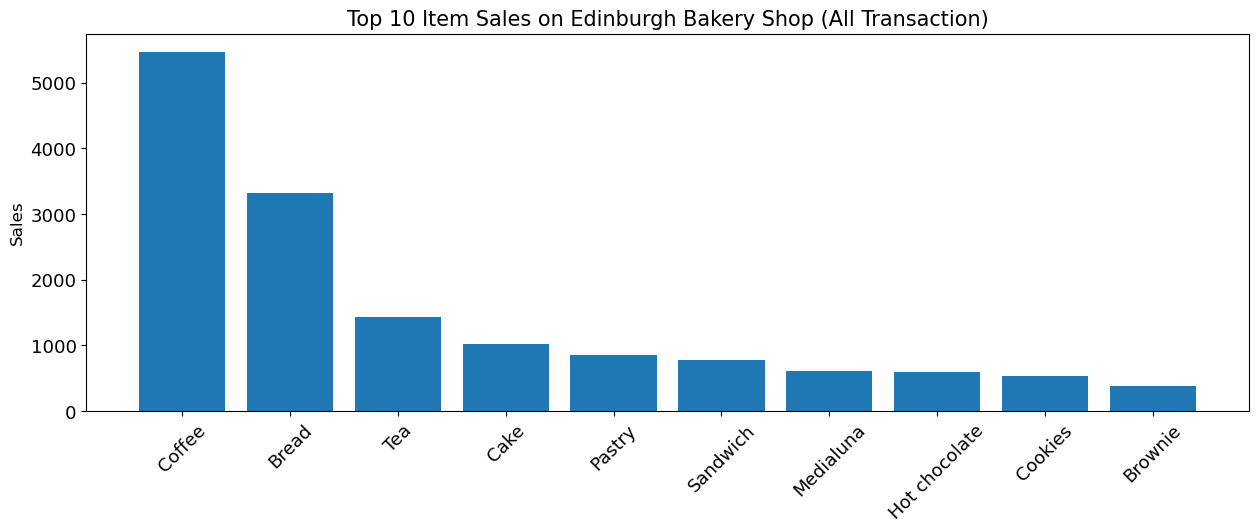

In [46]:
plt.figure(figsize=(15,5),dpi=100)
plt.bar(x=df_top_item['Item'], height=df_top_item['period_day'])
plt.title("Top 10 Item Sales on Edinburgh Bakery Shop (All Transaction)",size = 15)
# plt.xlabel('Item', size=12)
plt.ylabel("Sales",size=12)
plt.yticks(fontsize=13)
plt.xticks(rotation=45,size=13)
plt.show()

In [47]:
#### Bottom Item All Sales
df_bottom_item = df.pivot_table(index='Item', values='period_day', aggfunc='count').sort_values('period_day', ascending=False).tail(10).reset_index()
df_bottom_item

,Item,period_day
0,Bowl Nic Pitt,2
1,Hack the stack,2
2,Bacon,1
3,Polenta,1
4,The BART,1
5,Chicken sand,1
6,Gift voucher,1
7,Olum & polenta,1
8,Raw bars,1
9,Adjustment,1


- Coffee is the top item sold in Edinburgh Bakery Shop

##### Sales Breakdown By Food Bakery, Food Non_Bakery, and Beverages (Top & Bottom)

In [48]:
#### SALES CATEGORY BY BEVERAGES
df_beverage = df[df['item_category'] == 'Beverages'].pivot_table(index='Item', values='period_day', aggfunc='count').sort_values('period_day', ascending = False).reset_index()
df_beverage.to_excel('beverages.xlsx', index=False)
df_beverage

,Item,period_day
0,Coffee,5471
1,Tea,1435
2,Hot chocolate,590
3,Juice,369
4,Coke,185
5,Mineral water,136
6,Smoothies,77


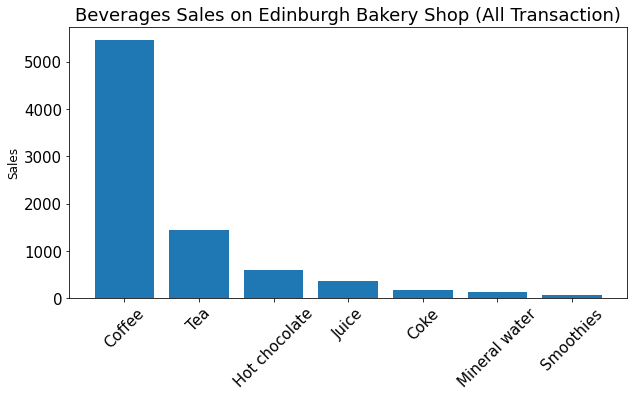

In [49]:
plt.figure(figsize=(10,5))
plt.bar(x=df_beverage['Item'], height=df_beverage['period_day'])
plt.title("Beverages Sales on Edinburgh Bakery Shop (All Transaction)",size = 18)
# plt.xlabel('Item', size=12)
plt.ylabel("Sales",size=12)
plt.yticks(fontsize=15)
plt.xticks(rotation=45,size=15)
plt.show()

- In Beverages Category, Coffee also is the top item sold in Edinburgh Bakery

In [50]:
### Sales Category By FOOD (Bakery & Non_Bakery)
df_food = df[df['item_category'] == 'Food'].pivot_table(index='Item', values='period_day', aggfunc='count').sort_values('period_day', ascending = False).reset_index()
df_food

,Item,period_day
0,Bread,3325
1,Cake,1025
2,Pastry,856
3,Sandwich,771
4,Medialuna,616
5,Cookies,540
6,Brownie,379
7,Farm House,374
8,Muffin,370
9,Alfajores,369


In [51]:
df_food5=df_food.head(10)

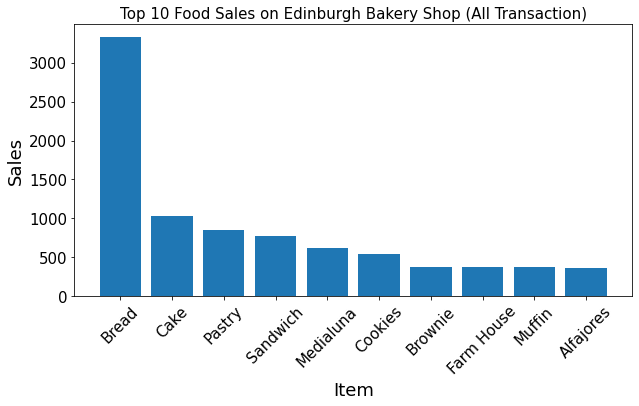

In [52]:
plt.figure(figsize=(10,5))
plt.bar(x=df_food5['Item'], height=df_food5['period_day'])
plt.title("Top 10 Food Sales on Edinburgh Bakery Shop (All Transaction)",size=15)
plt.xlabel('Item', size=18)
plt.ylabel("Sales",size=18)
plt.yticks(fontsize=15)
plt.xticks(rotation=45,size=15)
plt.show()

- Bread is the top item sold in Edinburgh Bakeryshop (in all food category)

In [53]:
#### By Bakery Category
df_bakery= df[df['bakery_category'] == 'Bakery'].pivot_table(index='Item', values='period_day', aggfunc='count').sort_values('period_day', ascending = False).reset_index()
df_bakery
df_bakery.to_excel('bakery.xlsx', index=False)

In [54]:
df_bakery_top5=df_bakery.head(10)

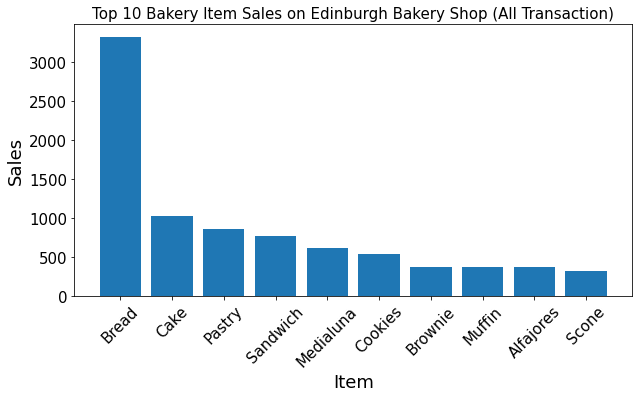

In [55]:
plt.figure(figsize=(10,5))
plt.bar(x=df_bakery_top5['Item'], height=df_bakery_top5['period_day'])
plt.title("Top 10 Bakery Item Sales on Edinburgh Bakery Shop (All Transaction)",size = 15)
plt.xlabel('Item', size=18)
plt.ylabel("Sales",size=18)
plt.yticks(fontsize=15)
plt.xticks(rotation=45,size=15)
plt.show()

- In Bakery Category, Bread also is the top item sold in Edinburgh Bakery Shop

In [56]:
df_non_bakery= df[(df['bakery_category'] == 'Non Bakery') & (df['item_category']=='Food')].pivot_table(index='Item', values='period_day', aggfunc='count').sort_values('period_day', ascending = False).reset_index()
df_non_bakery.to_excel('non_bakery.xlsx', index=False)
df_non_bakery

,Item,period_day
0,Farm House,374
1,Soup,342
2,Spanish Brunch,172
3,Chicken Stew,123
4,Hearty & Seasonal,107
5,Salad,99
6,Frittata,81
7,Keeping It Local,63
8,Vegan Feast,16
9,Tacos/Fajita,11


### MULTIVARIATE ANALYSIS

In [57]:
## Monthly Sales Food Bakery
df_monthly_salesfoodbakery = df[(df['item_category'] == 'Food') & (df['bakery_category'] == 'Bakery')].pivot_table(index='yearmonth', values='period_day', aggfunc='count').reset_index()
df_monthly_salesfoodbakery.rename(columns = {'period_day':'bakery_sales'}, inplace=True)
# df_monthly_salesfoodbakery

In [58]:
df_monthly_salesfoodnonbakery = df[(df['item_category'] == 'Food') & (df['bakery_category'] == 'Non Bakery')].pivot_table(index='yearmonth', values='period_day', aggfunc='count').reset_index()
df_monthly_salesfoodnonbakery.rename(columns = {'period_day':'non_bakery_sales'}, inplace=True)
# df_monthly_salesfoodnonbakery

In [59]:
df_merge_monthlytotalbakerynonbakery = pd.merge(df_monthly_salesfoodbakery, df_monthly_salesfoodnonbakery, on = ['yearmonth'])
# df_merge_monthlytotalbakerynonbakery

In [60]:
df_monthly_salesbeverages = df[(df['item_category'] == 'Beverages')].pivot_table(index='yearmonth', values='period_day', aggfunc='count').reset_index()
df_monthly_salesbeverages.rename(columns = {'period_day':'beverages_sales'}, inplace=True)
# df_monthly_salesbeverages

In [61]:
df_merge_monthlysales = pd.merge(df_merge_monthlytotalbakerynonbakery, df_monthly_salesbeverages, on = ['yearmonth'])
df_merge_monthlysales.drop(index=0, inplace=True)
df_merge_monthlysales.drop(index=6, inplace=True)

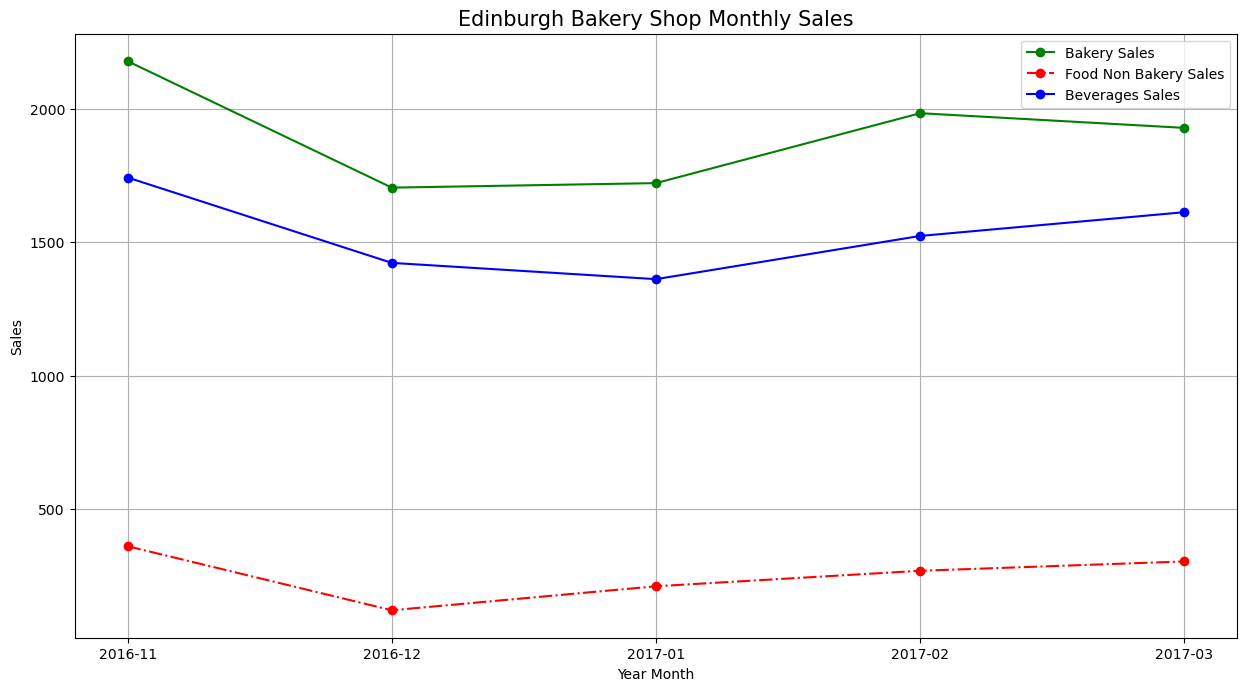

In [62]:
plt.figure(figsize=(15,8),dpi=100)
plt.plot(
    df_merge_monthlysales['yearmonth'], df_merge_monthlysales['bakery_sales'], 'go-',
    df_merge_monthlysales['yearmonth'], df_merge_monthlysales['non_bakery_sales'], 'ro-.',
    df_merge_monthlysales['yearmonth'], df_merge_monthlysales['beverages_sales'], 'bo-',

)
        
plt.title("Edinburgh Bakery Shop Monthly Sales", size=15)
plt.xlabel("Year Month")
plt.ylabel("Sales")
plt.grid(True)
plt.legend(["Bakery Sales", "Food Non Bakery Sales", "Beverages Sales"], loc=0)
plt.savefig('MonthlySales.png')

plt.show()

- Bakery is the top category item sold in Edinburgh Bakery Shop every month
- Beverages is the second top category item sold in Edinburgh Bakery Shop every month

##### Sales By Top Month (November 2016)

In [63]:
df_november_sales_byitemcategory = df[df['yearmonth']=='2016-11'].pivot_table(index='item_category', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False).head(10)
df_november_sales_byitemcategory.rename(columns = {'period_day':'Sales'}, inplace=True)
df_november_sales_byitemcategory.to_excel('november_sales_byitemcategory.xlsx', index=False)
df_november_sales_byitemcategory

,item_category,Sales
1,Food,2540
0,Beverages,1743
2,Others,153


In [64]:
df_november_sales_bakery = df[(df['bakery_category'] == 'Bakery') & (df['yearmonth'] == '2016-11')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_november_sales_bakery.rename(columns = {'period_day':'Sales'}, inplace=True)
df_november_sales_bakery.to_excel('november_sales_bakery.xlsx', index=False)
df_november_sales_bakery

,Item,Sales
2,Bread,712
15,Pastry,218
13,Medialuna,208
4,Brownie,154
0,Alfajores,141
14,Muffin,127
5,Cake,116
17,Scandinavian,105
16,Sandwich,103
7,Cookies,87


In [65]:
df_november_sales_nonbakery = df[(df['yearmonth']=='2016-11') & (df['item_category']=='Food') & (df['bakery_category']=='Non Bakery')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_november_sales_nonbakery.rename(columns = {'period_day':'Sales'}, inplace=True)
df_november_sales_nonbakery.to_excel('november_sales_nonbakery.xlsx', index=False)
df_november_sales_nonbakery

,Item,Sales
1,Farm House,113
5,Soup,98
3,Hearty & Seasonal,71
4,Keeping It Local,61
2,Frittata,17
0,Bacon,1


In [66]:
df_november_sales_beverage = df[(df['item_category'] == 'Beverages') & (df['yearmonth'] == '2016-11')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_november_sales_beverage.rename(columns = {'period_day':'Sales'}, inplace=True)
df_november_sales_beverage.to_excel('november_sales_beverage.xlsx', index=False)
df_november_sales_beverage

,Item,Sales
0,Coffee,1189
6,Tea,311
2,Hot chocolate,118
3,Juice,46
4,Mineral water,40
1,Coke,27
5,Smoothies,12


In [ ]:
- Food & Beverages category are top two item sold in Edinburgh Bakery Shop on most crowded month (November 2016)
- Bread is the most favorite bakery food category item sold in Edinburgh Bakery shop on most crowded month (November 2016)
- Farm house is the most favorite non-bakery food category item sold in Edinburgh Bakery Shop on most crowded month (November 2016)
- Coffee is the most beverages cateogry item sold in Edinburgh Bakery Shop on most crowded month (November 2016)

##### Sales By Lowest Month (December 2016)

In [67]:
df_december_sales_byitemcategory = df[df['yearmonth']=='2016-12'].pivot_table(index='item_category', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False).head(10)
df_december_sales_byitemcategory.rename(columns = {'period_day':'Sales'}, inplace=True)
df_december_sales_byitemcategory.to_excel('december_sales_byitemcategory.xlsx', index=False)
df_december_sales_byitemcategory

,item_category,Sales
1,Food,1826
0,Beverages,1423
2,Others,90


In [68]:
df_december_sales_bakery = df[(df['bakery_category'] == 'Bakery') & (df['yearmonth'] == '2016-12')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_december_sales_bakery.rename(columns = {'period_day':'Sales'}, inplace=True)
df_december_sales_bakery.to_excel('december_sales_bakery.xlsx', index=False)
df_december_sales_bakery

,Item,Sales
2,Bread,625
10,Medialuna,141
4,Cake,141
14,Sandwich,129
13,Pastry,129
16,Scone,69
5,Cookies,68
19,Toast,65
8,Fudge,60
0,Alfajores,45


In [69]:
df_december_sales_nonbakery = df[(df['yearmonth']=='2016-12') & (df['item_category']=='Food') & (df['bakery_category'] == 'Non Bakery')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_december_sales_nonbakery.rename(columns = {'period_day':'Sales'}, inplace=True)
df_december_sales_nonbakery.to_excel('december_sales_nonbakery.xlsx', index=False)
df_december_sales_nonbakery

,Item,Sales
1,Farm House,76
2,Frittata,26
3,Hearty & Seasonal,10
5,Pintxos,6
4,Keeping It Local,2
0,Brioche and salami,1


In [70]:
df_december_sales_beverages = df[(df['item_category'] == 'Beverages') & (df['yearmonth'] == '2016-12')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_december_sales_beverages.rename(columns = {'period_day':'Sales'}, inplace=True)
df_december_sales_beverages.to_excel('december_sales_beverages.xlsx', index=False)
df_december_sales_beverages

,Item,Sales
0,Coffee,932
6,Tea,235
2,Hot chocolate,138
3,Juice,55
1,Coke,34
4,Mineral water,20
5,Smoothies,9


In [ ]:
- Food & Beverages category are top two item sold in Edinburgh Bakery Shop on most crowded month (December 2016)
- Bread is the most favorite bakery food category item sold in Edinburgh Bakery shop on most crowded month (December 2016)
- Farm house is the most favorite non-bakery food category item sold in Edinburgh Bakery Shop on most crowded month (December 2016)
- Coffee is the most beverages cateogry item sold in Edinburgh Bakery Shop on most crowded month (December 2016)

##### Sales By Week Period

In [71]:
### Sales Weekendweekday By Bakery
df_weekendweekday_salesbakery = df[(df['item_category'] == 'Food') & (df['bakery_category'] == 'Bakery')].pivot_table(index='weekday_weekend', values='period_day', aggfunc='count').reset_index()
df_weekendweekday_salesbakery.rename(columns = {'period_day':'bakery_sales'}, inplace=True)
# df_weekendweekday_salesbakery

In [72]:
df_weekendweekday_salesnonbakery = df[(df['item_category'] == 'Food') & (df['bakery_category'] == 'Non Bakery')].pivot_table(index='weekday_weekend', values='period_day', aggfunc='count').reset_index()
df_weekendweekday_salesnonbakery.rename(columns = {'period_day':'non_bakery_sales'}, inplace=True)
# df_weekendweekday_nonsalesbakery

In [73]:
df_mergeweekdays_totalbakerynonbakery = pd.merge(df_weekendweekday_salesbakery, df_weekendweekday_salesnonbakery, on = ['weekday_weekend'])
# df_mergeweekdays_totalbakerynonbakery

In [74]:
df_weekendweekday_salesbeverages = df[(df['item_category'] == 'Beverages')].pivot_table(index='weekday_weekend', values='period_day', aggfunc='count').reset_index()
df_weekendweekday_salesbeverages.rename(columns = {'period_day':'beverages_sales'}, inplace=True)
# df_weekendweekday_salesbeverages

In [75]:
df_mergeweekdays_total = pd.merge(df_mergeweekdays_totalbakerynonbakery, df_weekendweekday_salesbeverages, on = ['weekday_weekend'])
df_mergeweekdays_total

,weekday_weekend,bakery_sales,non_bakery_sales,beverages_sales
0,weekday,6273,889,5334
1,weekend,3977,510,2929


- Bakery category items dominate all transaction either on Weekday or Weekend

##### Sales By Day

In [76]:
df_day_sales = df.pivot_table(index='nameday', values='period_day', aggfunc='count').reset_index().sort_values('nameday')
df_day_sales.rename(columns = {'period_day':'total_sales'}, inplace=True)
# df_day_sales

In [77]:
df_day_bakerysales = df[df['bakery_category']== 'Bakery'].pivot_table(index='nameday', values='period_day', aggfunc='count').reset_index().sort_values('nameday')
df_day_bakerysales.rename(columns = {'period_day':'bakery_sales'}, inplace=True)
# df_day_bakerysales

In [78]:
df_mergeweekdays_totalbakery = pd.merge(df_day_sales, df_day_bakerysales, on = ['nameday'])
# df_mergeweekdays_totalbakery

In [79]:
df_day_beveragessales = df[df['item_category']== 'Beverages'].pivot_table(index='nameday', values='period_day', aggfunc='count').reset_index().sort_values('nameday')
df_day_beveragessales.rename(columns = {'period_day':'beverages_sales'}, inplace=True)
# df_day_beveragessales

In [80]:
df_mergeweekdaystotal_total = pd.merge(df_mergeweekdays_totalbakery, df_day_beveragessales, on = ['nameday'])
df_mergeweekdaystotal_total

,nameday,total_sales,bakery_sales,beverages_sales
0,Monday,2324,1117,1003
1,Tuesday,2392,1117,1038
2,Wednesday,2321,1115,989
3,Thursday,2646,1325,1057
4,Friday,3124,1599,1247
5,Saturday,4605,2409,1713
6,Sunday,3095,1568,1216


- Bakery item category dominate in daily sales transaction

##### Sales Saturday (Top Daily Sales)

In [81]:
df_saturday_sales_byitemcategory = df[df['nameday']=='Saturday'].pivot_table(index='item_category', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_saturday_sales_byitemcategory.rename(columns = {'period_day':'Sales'}, inplace=True)
df_saturday_sales_byitemcategory.to_excel('saturday_sales_byitemcategory.xlsx', index=False)
df_saturday_sales_byitemcategory

,item_category,Sales
1,Food,2714
0,Beverages,1713
2,Others,178


In [82]:
df_saturday_sales_byfoodbakerycategory = df[(df['bakery_category'] == 'Bakery') & (df['nameday'] == 'Saturday')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_saturday_sales_byfoodbakerycategory.rename(columns = {'period_day':'Sales'}, inplace=True)
df_saturday_sales_byfoodbakerycategory.to_excel('saturday_sales_byitembakerycategory.xlsx', index=False)
df_saturday_sales_byfoodbakerycategory

,Item,Sales
3,Bread,760
5,Cake,246
15,Pastry,166
17,Sandwich,161
19,Scone,146
12,Medialuna,143
18,Scandinavian,118
4,Brownie,111
13,Muffin,93
7,Cookies,79


In [83]:
df_saturday_sales_nonbakery = df[(df['nameday'] == 'Saturday') & (df['item_category']=='Food') & (df['bakery_category']=='Non Bakery')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_saturday_sales_nonbakery.rename(columns = {'period_day':'Sales'}, inplace=True)
df_saturday_sales_nonbakery.to_excel('saturday_sales_nonbakery.xlsx', index=False)
df_saturday_sales_nonbakery

,Item,Sales
1,Farm House,76
7,Soup,50
8,Spanish Brunch,47
2,Frittata,39
0,Chicken Stew,22
6,Salad,22
3,Hearty & Seasonal,18
10,Vegan Feast,10
9,Tacos/Fajita,8
4,Keeping It Local,7


In [84]:
df_saturday_sales_bybeveragecategory = df[(df['item_category'] == 'Beverages') & (df['nameday'] == 'Saturday')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_saturday_sales_bybeveragecategory.rename(columns = {'period_day':'Sales'}, inplace=True)
df_saturday_sales_bybeveragecategory.to_excel('saturday_sales_bybeverages.xlsx', index=False)
df_saturday_sales_bybeveragecategory

,Item,Sales
0,Coffee,1103
6,Tea,288
2,Hot chocolate,146
3,Juice,85
1,Coke,45
4,Mineral water,27
5,Smoothies,19


- Food & Beverages category are top two item sold in Edinburgh Bakery Shop on most crowded day (Saturday)
- Bread is the most favorite bakery food category item sold in Edinburgh Bakery shop on most crowded day (Saturday)
- Farm house is the most favorite non-bakery food category item sold in Edinburgh Bakery Shop on most crowded day (Saturday)
- Coffee is the most beverages cateogry item sold in Edinburgh Bakery Shop on most crowded day (Saturday)

##### Sales Wednesday (Lowest Daily Sales)

In [85]:
df_wednesday_sales_byitemcategory = df[df['nameday']=='Wednesday'].pivot_table(index='item_category', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_wednesday_sales_byitemcategory.rename(columns = {'period_day':'Sales'}, inplace=True)
df_wednesday_sales_byitemcategory.to_excel('wednesday_sales_byitemcategory.xlsx', index=False)
df_wednesday_sales_byitemcategory

,item_category,Sales
1,Food,1268
0,Beverages,989
2,Others,64


In [86]:
df_wednesday_sales_byfoodcategorybakery = df[(df['nameday']=='Wednesday') & (df['bakery_category']=='Bakery')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_wednesday_sales_byfoodcategorybakery.rename(columns = {'period_day':'Sales'}, inplace=True)
df_wednesday_sales_byfoodcategorybakery.to_excel('wednesday_sales_byfoodcategorybakery.xlsx', index=False)
df_wednesday_sales_byfoodcategorybakery

,Item,Sales
3,Bread,405
6,Cake,123
14,Pastry,103
16,Sandwich,92
7,Cookies,63
12,Medialuna,56
0,Alfajores,41
22,Toast,35
5,Brownie,30
13,Muffin,29


In [87]:
df_wednesday_sales_nonbakery = df[(df['nameday'] == 'Wednesday') & (df['item_category']=='Food') & (df['bakery_category']=='Non Bakery')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_wednesday_sales_nonbakery.rename(columns = {'period_day':'Sales'}, inplace=True)
df_wednesday_sales_nonbakery.to_excel('wednesday_sales_nonbakery.xlsx', index=False)
df_wednesday_sales_nonbakery

,Item,Sales
5,Soup,56
1,Farm House,40
0,Chicken Stew,14
2,Hearty & Seasonal,12
4,Salad,11
6,Spanish Brunch,10
3,Keeping It Local,9
7,Vegan Feast,1


In [88]:
df_wednesday_sales_bybeveragecategory = df[(df['item_category'] == 'Beverages') & (df['nameday'] == 'Wednesday')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_wednesday_sales_bybeveragecategory.rename(columns = {'period_day':'Sales'}, inplace=True)
df_wednesday_sales_bybeveragecategory.to_excel('wednesday_sales_beverages.xlsx', index=False)
df_wednesday_sales_bybeveragecategory

,Item,Sales
0,Coffee,628
6,Tea,188
2,Hot chocolate,69
3,Juice,44
1,Coke,34
4,Mineral water,18
5,Smoothies,8


- Food & Beverages category are top two item sold in Edinburgh Bakery Shop on least crowded day (Wednesday)
- Bread is the most favorite bakery food category item sold in Edinburgh Bakery shop on least crowded day (Wednesday)
- Soup is the most favorite non-bakery food category item sold in Edinburgh Bakery Shop on least crowded day (Wednesday)
- Coffee is the most beverages cateogry item sold in Edinburgh Bakery Shop on least crowded day (Wednesday)

##### Sales By Time Period

In [90]:
period = ['morning', 'afternoon', 'evening', 'night']
df['period_day'] = pd.Categorical(df['period_day'], categories=period, ordered=True)

In [91]:
df_periodtime_sales = df.pivot_table(index='period_day', values='weekday_weekend', aggfunc='count').reset_index()
df_periodtime_sales.rename(columns = {'weekday_weekend':'total_sales'}, inplace=True)
# df_periodtime_sales

In [92]:
df_periodtime_salesbakery = df[(df['bakery_category']=='Bakery')].pivot_table(index='period_day', values='weekday_weekend', aggfunc='count').reset_index()
df_periodtime_salesbakery.rename(columns = {'weekday_weekend':'bakery_sales'}, inplace=True)
# df_periodtime_salesbakery

In [93]:
df_mergeperiodtime_totalbakery = pd.merge(df_periodtime_sales, df_periodtime_salesbakery, on = ['period_day'])
# df_mergeperiodtime_totalbakery

In [94]:
df_periodtime_salesbeverages = df[(df['item_category']=='Beverages')].pivot_table(index='period_day', values='weekday_weekend', aggfunc='count').reset_index()
df_periodtime_salesbeverages.rename(columns = {'weekday_weekend':'beverages_sales'}, inplace=True)
# df_periodtime_salesbeverages

In [95]:
df_mergeperiodtime_totalbakerybeverages = pd.merge(df_mergeperiodtime_totalbakery, df_periodtime_salesbeverages, on = ['period_day'])
df_mergeperiodtime_totalbakerybeverages

,period_day,total_sales,bakery_sales,beverages_sales
0,morning,8404,4380,3454
1,afternoon,11569,5643,4619
2,evening,520,226,186
3,night,14,1,4


- Bakery category dominates sales on Morning, Afternoon, and Evening Period
- People tend to buy more beverages on Night Period

# DATA INSIGHT

- Sales for 2 months in 2016 (November, December) are larger than Sales for 2 Months in 2017 (January, February)
- Most transaction occurred on November 2016 
- Least transaction occored on December 2016
- Most transaction occurred on the beginning of the month
- Most Transaction occurred on Saturday 
- Least Transaction occurred on Wednesday
- Most Tranasaction Occurred on Afternoon Period
- Least Transaction Occured on Evening & Night Period
- From research https://www.timeanddate.com/weather/uk/edinburgh/historic?month=4&year=2017 : the weather during this transaction period was on winter --> People tend to stay at home on evening and night
- Food is the top category item sold for all transaction in Edinburgh Bakeryshop
- Beverages is the second top category item sold for all transaction in Edinburgh Bakeryshop
- Bakery category dominates food category sales in Edinburgh Bakery Store
- Coffee is the overall top item sold in Edinburgh Bakery Shop
- In Beverages Category, Coffee also is the top item sold in Edinburgh Bakery
- Bread is the top item sold in Edinburgh Bakeryshop (in all food category)
- In Bakery Category, Bread also is the top item sold in Edinburgh Bakery Shop
- Bakery is the top category item sold in Edinburgh Bakery Shop every month
- Beverages is the second top category item sold in Edinburgh Bakery Shop every month
- Food & Beverages category are top two item sold in Edinburgh Bakery Shop on most crowded month (November 2016)
- Bread is the most favorite bakery food category item sold in Edinburgh Bakery shop on most crowded month (November 2016)
- Farm house is the most favorite non-bakery food category item sold in Edinburgh Bakery Shop on most crowded month (November 2016)
- Coffee is the most beverages cateogry item sold in Edinburgh Bakery Shop on most crowded month (November 2016)
- Food & Beverages category are top two item sold in Edinburgh Bakery Shop on most crowded month (December 2016)
- Bread is the most favorite bakery food category item sold in Edinburgh Bakery shop on most crowded month (December 2016)
- Farm house is the most favorite non-bakery food category item sold in Edinburgh Bakery Shop on most crowded month (December 2016)
- Coffee is the most beverages cateogry item sold in Edinburgh Bakery Shop on most crowded month (December 2016)
- Bakery category items dominate all transaction either on Weekday or Weekend
- Bakery category items dominate in daily sales transaction
- Food & Beverages category are top two item sold in Edinburgh Bakery Shop on most crowded day (Saturday)
- Bread is the most favorite bakery food category item sold in Edinburgh Bakery shop on most crowded day (Saturday)
- Farm house is the most favorite non-bakery food category item sold in Edinburgh Bakery Shop on most crowded day (Saturday)
- Coffee is the most beverages cateogry item sold in Edinburgh Bakery Shop on most crowded day (Saturday)
- Food & Beverages category are top two item sold in Edinburgh Bakery Shop on least crowded day (Wednesday)
- Bread is the most favorite bakery food category item sold in Edinburgh Bakery shop on least crowded day (Wednesday)
- Soup is the most favorite non-bakery food category item sold in Edinburgh Bakery Shop on least crowded day (Wednesday)
- Coffee is the most beverages cateogry item sold in Edinburgh Bakery Shop on least crowded day (Wednesday)
- Bakery category dominates sales on Morning, Afternoon, and Evening Period
- People tend to buy more beverages on Night Period

# SUMMARY & RECOMMENDATION

1. From all transaction breakdown (By Year, By Month, By Weekdays-Weekend, By Day, and By Period Time):
- Coffee had the most transaction at Edinburgh Bakery Shop. 
- The Nomad, Vegan mincepie, Focaccia, Bakewell, Tartine, Kids Biscuit, Empanadas, Crepes, Panatone, Bread Pudding, Caramel Bites, Raspberry shortbread sandwich, and Raw bars had the least transaction item at Edinburgh Bakery Shop. 
2. Saturday was the most crowded transaction and Wednesday was the least crowded transaction on Edinburgh Bakery Shop


Suggestion : 
- To conduct package discount promotion every Saturday and Wednesday for one month period which combine Coffee + least popular Bakery Item  
- Reduce everyday stock (except on promotion day) for least popular Bakery Item to avoid losses
- Created Membership Account and Card to assess Customer Loyalty Point (Future Works)

# BUSINESS IMPACT SIMULATION

In [100]:
df_saturday_sales_bybeveragecategory = df[(df['item_category'] == 'Beverages') & (df['nameday'] == 'Saturday') & (df['yearmonth']=='2016-12')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_saturday_sales_bybeveragecategory.rename(columns = {'period_day':'Sales'}, inplace=True)
df_saturday_sales_bybeveragecategory.to_excel('saturday_sales__december_beverages.xlsx', index=False)
df_saturday_sales_bybeveragecategory

,Item,Sales
0,Coffee,175
6,Tea,58
2,Hot chocolate,37
3,Juice,16
1,Coke,10
4,Mineral water,4
5,Smoothies,1


In [101]:
df_saturday_sales_bybeveragecategory = df[(df['item_category'] == 'Beverages') & (df['nameday'] == 'Wednesday') & (df['yearmonth']=='2016-12')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_saturday_sales_bybeveragecategory.rename(columns = {'period_day':'Sales'}, inplace=True)
df_saturday_sales_bybeveragecategory.to_excel('wednesday_sales__december_beverages.xlsx', index=False)
df_saturday_sales_bybeveragecategory

,Item,Sales
0,Coffee,128
6,Tea,29
2,Hot chocolate,18
1,Coke,8
3,Juice,8
4,Mineral water,2
5,Smoothies,1


Additional 303 Bakery Sales --> Total Sales 3651 

#### INCREASE SALES : 9,1%!